In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# path to the file
file_path = 'Downloads/Data Source (sales_transactions).csv'
sales = pd.read_csv(file_path, encoding='latin1')

In [4]:
sales_Trans= pd.DataFrame(sales)
sales_Trans

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied
0,1,1002.0,08/08/24 22:00,2008,Grocery,1,10.0,10.0,20,Trust Points,5.0
1,2,NaN,07/08/24 1:00,2004,Home Decor,1,10.0,10.0,0,Credit Card,20.0
2,3,1004.0,02/08/24 19:00,2002,Grocery,3,30.0,90.0,0,Credit Card,25.0
3,2,1003.0,07/08/24 17:00,2001,Toys,2,30.0,60.0,50,NaN,20.0
4,5,1001.0,09/08/24 9:00,2008,Grocery,1,NaN,NaN,20,Trust Points,5.0
5,6,1001.0,NaN,2007,Home Decor,1,NaN,NaN,20,Credit Card,NaN
6,7,1001.0,01/08/24 13:00,2007,Home Decor,-1,30.0,-30.0,-10,NaN,NaN
7,8,1005.0,04/08/24 22:00,2006,Toys,1,50.0,50.0,-10,Trust Points,30.0
8,9,1004.0,02/08/24 23:00,2008,Fashion,1,NaN,NaN,-10,NaN,NaN
9,10,1004.0,01/08/24 14:00,2005,Fashion,2,500.0,1000.0,-10,Cash,30.0


# Replaced and removed nan Values

In [ ]:
# Remove nan values in  cusomerid and transaction data
df = pd.DataFrame(sales_Trans)
df1 = df.dropna(subset=['CustomerID','TransactionDate'])
df1
# replaced nan values with 0
df1.loc[:, 'TotalAmount'] = df1['TotalAmount'].fillna(0)
df1.loc[:, 'PricePerUnit'] = df1['PricePerUnit'].fillna(0)
df1.loc[:, 'DiscountApplied'] = df1['DiscountApplied'].fillna(0)
df1


# Decimal value to be converted in to interger data type

In [12]:
# convert the decimal values into interger
columns_to_convert = ['CustomerID', 'TotalAmount', 'PricePerUnit', 'DiscountApplied']
df1.loc[:, columns_to_convert] = df1[columns_to_convert].fillna(0).astype(int)
print(df1)

    TransactionID  CustomerID TransactionDate  ProductID ProductCategory  \
0               1        1002  08/08/24 22:00       2008         Grocery   
2               3        1004  02/08/24 19:00       2002         Grocery   
3               2        1003  07/08/24 17:00       2001            Toys   
4               5        1001   09/08/24 9:00       2008         Grocery   
6               7        1001  01/08/24 13:00       2007      Home Decor   
7               8        1005  04/08/24 22:00       2006            Toys   
8               9        1004  02/08/24 23:00       2008         Fashion   
9              10        1004  01/08/24 14:00       2005         Fashion   
10             11        1001   09/08/24 7:00       2003         Grocery   
12             13        1005  09/08/24 22:00       2008         Grocery   
13             14        1002  08/08/24 21:00       2006            Toys   
14             15        1001  02/08/24 15:00       2003            Toys   
15          

# Customer ID who ordered more in quantity

In [17]:
quantity_sum = df1.groupby('CustomerID')['Quantity'].sum()
first_row = quantity_sum.head(1)
first_row

CustomerID
1001    22
Name: Quantity, dtype: int64

# Replace nan in to values

In [47]:
df1.loc[:, 'PaymentMethod'] = df1['PaymentMethod'].fillna('Payment Process Pending')
df1

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied
0,1,1002,08/08/24 22:00,2008,Grocery,1,10,10,20,Trust Points,5
2,3,1004,02/08/24 19:00,2002,Grocery,3,30,90,0,Credit Card,25
3,2,1003,07/08/24 17:00,2001,Toys,2,30,60,50,Payment Process Pending,20
4,5,1001,09/08/24 9:00,2008,Grocery,1,0,0,20,Trust Points,5
6,7,1001,01/08/24 13:00,2007,Home Decor,-1,30,-30,-10,Payment Process Pending,0
7,8,1005,04/08/24 22:00,2006,Toys,1,50,50,-10,Trust Points,30
8,9,1004,02/08/24 23:00,2008,Fashion,1,0,0,-10,Payment Process Pending,0
9,10,1004,01/08/24 14:00,2005,Fashion,2,500,1000,-10,Cash,30
10,11,1001,09/08/24 7:00,2003,Grocery,5,0,0,-10,Credit Card,20
12,13,1005,09/08/24 22:00,2008,Grocery,3,0,0,100,Trust Points,50


# Total Sales by Product Category

In [21]:
totalsales = df1.groupby('ProductCategory')['TotalAmount'].sum().sort_values(ascending=False).reset_index()
totalsales

,ProductCategory,TotalAmount
0,Home Decor,2010
1,Fashion,1050
2,Electronics,850
3,Toys,840
4,Grocery,300


# Which product has made the maximum sales

In [23]:
Max_product = df1.groupby('ProductCategory')['TotalAmount'].sum().sort_values(ascending=False).head(1).reset_index()
Max_product

,ProductCategory,TotalAmount
0,Home Decor,2010


# Which product has made the minimum sales

In [25]:
Min_product = df1.groupby('ProductCategory')['TotalAmount'].sum().sort_values(ascending=True).head(1).reset_index()
Min_product

,ProductCategory,TotalAmount
0,Grocery,300


# Customer ID with number of Transactions

In [27]:
df1.groupby('CustomerID').size().reset_index(name='No of Transactions')

,CustomerID,No of Transactions
0,1001,14
1,1002,9
2,1003,10
3,1004,8
4,1005,3


# Total discounts used by each customers

In [35]:
df1.groupby('CustomerID')['DiscountApplied'].sum().reset_index(name='Total Discounts')

,CustomerID,Total Discounts
0,1001,205
1,1002,205
2,1003,255
3,1004,185
4,1005,130


# Total Sales by Product Category

<Axes: title={'center': 'Total Sales by Product Category'}, ylabel='ProductCategory'>

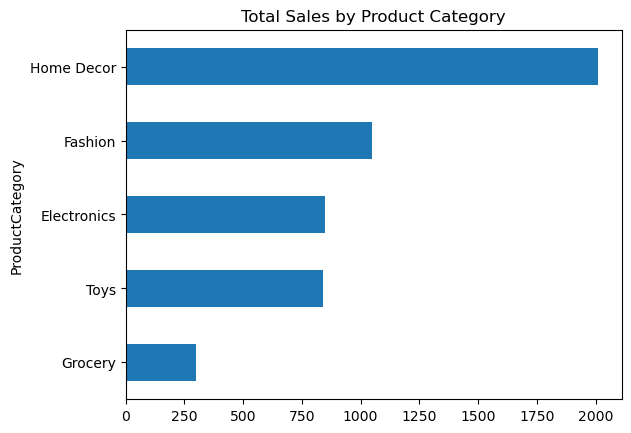

In [85]:
df1.groupby('ProductCategory')['TotalAmount'].sum().sort_values(ascending=True).plot(kind='barh', title="Total Sales by Product Category")


# Total Trust Points Used by Each Customer

<Axes: title={'center': 'Total Trust Points'}, xlabel='CustomerID'>

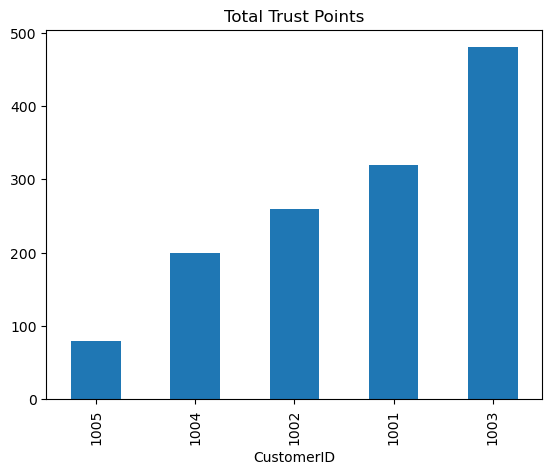

In [89]:
 df1.groupby('CustomerID')['TrustPointsUsed'].sum().sort_values(ascending=True).plot(kind='bar', title="Total Trust Points")

# List the products that were returned (assume negative values in quantity)

In [21]:
product = df1[(df1['Quantity'] < 1) & (df1['Quantity'] != 0)]
distinct_product= product['ProductCategory'].unique()
distinct_product

array(['Home Decor', 'Electronics'], dtype=object)

# Total sales by payment method

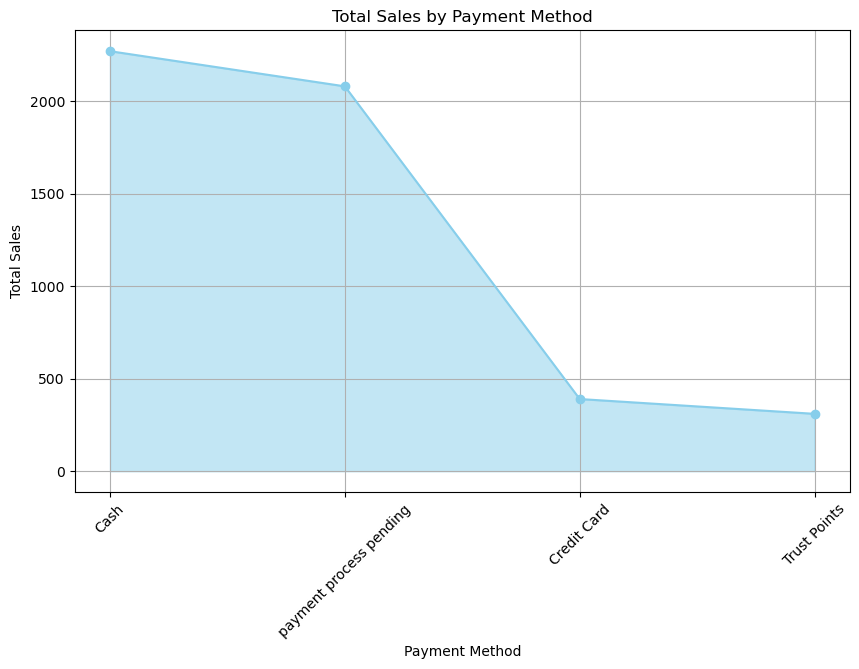

In [29]:
df1.loc[df1['PaymentMethod'].isna(), 'PaymentMethod'] = 'payment process pending'

# Group by PaymentMethod and calculate TotalSales
grouped = df1.groupby('PaymentMethod')['TotalAmount'].sum().reset_index(name='TotalSales')

# Calculate SalesContribution
total_sales = grouped['TotalSales'].sum()
grouped['SalesContribution'] = round((grouped['TotalSales'] / total_sales) * 100, 2)

# Sort the grouped DataFrame by TotalSales in descending order
grouped = grouped.sort_values(by='TotalSales', ascending=False)

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.fill_between(grouped['PaymentMethod'], grouped['TotalSales'], color='skyblue', alpha=0.5)
plt.plot(grouped['PaymentMethod'], grouped['TotalSales'], marker='o', linestyle='-', color='skyblue')
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Average discount by product 

<Axes: title={'center': 'Average Discount by Product Category'}, xlabel='ProductCategory'>

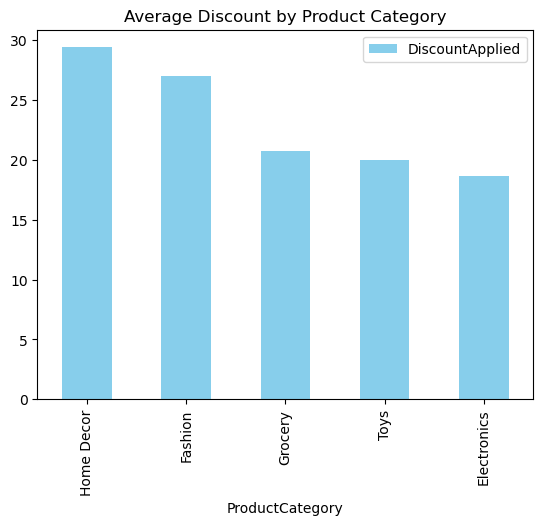

In [19]:
Discount = df1.groupby('ProductCategory')['DiscountApplied'].mean().round(2).reset_index().sort_values(by='DiscountApplied', ascending=False)

Discount.plot(kind='bar', x='ProductCategory', y='DiscountApplied', color='skyblue', title="Average Discount by Product Category")

# Most used payments

In [28]:
payment = df1[df1['PaymentMethod'] != 'Payment Process Pending']
count = payment['PaymentMethod'].value_counts().reset_index()

# Rename the columns
count.columns = ['PaymentMethod', 'count of payment method']

# top result
top_result = count.head(1)

print(top_result)


  PaymentMethod  count of payment method
0          Cash                       14


# Customerid with most pending payments 

In [56]:
payment = df1[df1['PaymentMethod'] == 'Payment Process Pending']

# Group by 'CustomerID' and count  of 'PaymentMethod'
count = payment.groupby('CustomerID').size().reset_index(name='count')

# Rank the counts in descending order
count['maxcount'] = count['count'].rank(method='dense', ascending=False).astype(int)

result = count[count['maxcount'] == 1]['CustomerID']
result


2    1003
3    1004
Name: CustomerID, dtype: int32

# List the pending payment process 

In [55]:
payment = df1[df1['PaymentMethod'] == 'Payment Process Pending']
columns = payment[['CustomerID', 'TransactionDate', 'PaymentMethod']]
columns


,CustomerID,TransactionDate,PaymentMethod
3,1003,07/08/24 17:00,Payment Process Pending
6,1001,01/08/24 13:00,Payment Process Pending
8,1004,02/08/24 23:00,Payment Process Pending
16,1002,09/08/24 15:00,Payment Process Pending
18,1003,05/08/24 14:00,Payment Process Pending
20,1004,01/08/24 23:00,Payment Process Pending
31,1001,03/08/24 22:00,Payment Process Pending
36,1002,09/08/24 23:00,Payment Process Pending
45,1004,01/08/24 4:00,Payment Process Pending
47,1003,02/08/24 3:00,Payment Process Pending
